In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Imports above 

Full_df = pd.read_csv('merged.csv') # Importing Data

Full_df['Status'].replace(to_replace=['Developed', 'Developing'], value=[1, 0], inplace=True) # Encoding class label

Full_df.Status.unique() # Checking to see if the replace worked

array([0, 1])

I am building the df with only the economic features below

In [3]:
Econ_df = Full_df[['Status', 'GDP_per_capita', 'Gross National Income (GNI)', 'GNI per capita']].copy()

Econ_df

,Status,GDP_per_capita,Gross National Income (GNI),GNI per capita
0,0,556,559.415182,16.257343
1,0,3953,3997.212090,1387.920865
2,0,4178,4100.199985,103.201610
3,0,3128,4004.517528,143.634058
4,0,14285,14520.108334,161334.537049
...,...,...,...,...
167,0,17318,10946.182170,363.902333
168,0,2582,2463.536448,26.581101
169,0,1602,858.432890,32.393694
170,0,1338,1285.992802,80.981914


I am building a df with only the social & health features below

In [4]:
Social_Health_df = Full_df.drop(columns = ['GDP_per_capita', 'Gross National Income (GNI)', 'GNI per capita', "Region", 'Year', 'Country' ])

Social_Health_df

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Status
0,53.2,70.4,227.7350,0.00,65,42,23.3,67,65,0.03,34.41,17.2,17.3,3.6,63.4,0
1,8.5,9.6,75.2050,4.33,99,98,26.6,99,99,0.03,2.88,1.2,1.3,9.7,78.0,0
2,21.6,25.2,95.8155,0.55,95,99,25.5,95,95,0.05,39.73,6.0,5.8,7.9,76.1,0
3,57.7,88.1,242.9655,6.53,64,64,23.2,62,64,0.89,27.88,8.3,8.2,5.0,59.4,0
4,6.5,7.8,130.0025,9.06,99,84,26.6,86,99,0.20,0.09,3.3,3.3,9.2,76.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,16.4,19.1,141.5540,6.21,87,83,26.7,87,87,0.40,30.08,1.6,1.5,10.1,72.6,0
168,17.4,21.8,124.5470,2.98,97,65,21.7,97,97,0.12,92.68,14.2,14.5,8.0,75.1,0
169,46.1,60.7,221.5195,0.03,69,95,23.7,63,69,0.03,26.50,13.6,13.4,3.0,66.1,0
170,46.9,67.7,302.8220,3.50,90,47,22.5,90,90,4.48,15.88,6.3,6.1,6.9,61.7,0


# I have made my three dataframes

**Full_df** - all the features

**Econ_df** - economic features

**Social_Health_df** - social & health features

# Full_df

In [5]:
Full_df

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Status,Gross National Income (GNI),GNI per capita
0,Afghanistan,Asia,2015,53.2,70.4,227.7350,0.00,65,42,23.3,...,0.03,556,34.41,17.2,17.3,3.6,63.4,0,559.415182,16.257343
1,Albania,Rest of Europe,2015,8.5,9.6,75.2050,4.33,99,98,26.6,...,0.03,3953,2.88,1.2,1.3,9.7,78.0,0,3997.212090,1387.920865
2,Algeria,Africa,2015,21.6,25.2,95.8155,0.55,95,99,25.5,...,0.05,4178,39.73,6.0,5.8,7.9,76.1,0,4100.199985,103.201610
3,Angola,Africa,2015,57.7,88.1,242.9655,6.53,64,64,23.2,...,0.89,3128,27.88,8.3,8.2,5.0,59.4,0,4004.517528,143.634058
4,Antigua and Barbuda,Central America and Caribbean,2015,6.5,7.8,130.0025,9.06,99,84,26.6,...,0.20,14285,0.09,3.3,3.3,9.2,76.5,0,14520.108334,161334.537049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,"Venezuela, RB",South America,2015,16.4,19.1,141.5540,6.21,87,83,26.7,...,0.40,17318,30.08,1.6,1.5,10.1,72.6,0,10946.182170,363.902333
168,Vietnam,Asia,2015,17.4,21.8,124.5470,2.98,97,65,21.7,...,0.12,2582,92.68,14.2,14.5,8.0,75.1,0,2463.536448,26.581101
169,"Yemen, Rep.",Middle East,2015,46.1,60.7,221.5195,0.03,69,95,23.7,...,0.03,1602,26.50,13.6,13.4,3.0,66.1,0,858.432890,32.393694
170,Zambia,Africa,2015,46.9,67.7,302.8220,3.50,90,47,22.5,...,4.48,1338,15.88,6.3,6.1,6.9,61.7,0,1285.992802,80.981914


Below is my decision tree model for the dataframe with the combined features

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.86      1.00      0.92         6

    accuracy                           0.97        35
   macro avg       0.93      0.98      0.95        35
weighted avg       0.98      0.97      0.97        35

[[28  1]
 [ 0  6]]


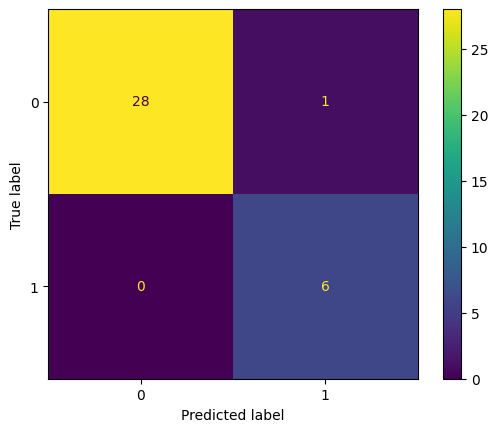

In [6]:
y = Full_df.Status
X = Full_df.drop(columns= ['Status', "Region", 'Year', 'Country'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

full_dtc = DecisionTreeClassifier(max_depth=5)
full_dtc.fit(X_train, y_train)
y_pred = full_dtc.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cmtr = confusion_matrix(y_test, y_pred) # CM Scores again
disptr = ConfusionMatrixDisplay(confusion_matrix=cmtr,
                               display_labels=[0,1]) # Making the display
disptr.plot() # Plotting it
plt.show() # Showing it

# Now I will build the Econ_df decision tree

In [7]:
Econ_df


,Status,GDP_per_capita,Gross National Income (GNI),GNI per capita
0,0,556,559.415182,16.257343
1,0,3953,3997.212090,1387.920865
2,0,4178,4100.199985,103.201610
3,0,3128,4004.517528,143.634058
4,0,14285,14520.108334,161334.537049
...,...,...,...,...
167,0,17318,10946.182170,363.902333
168,0,2582,2463.536448,26.581101
169,0,1602,858.432890,32.393694
170,0,1338,1285.992802,80.981914


[[28  1]
 [ 4  2]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.67      0.33      0.44         6

    accuracy                           0.86        35
   macro avg       0.77      0.65      0.68        35
weighted avg       0.84      0.86      0.84        35



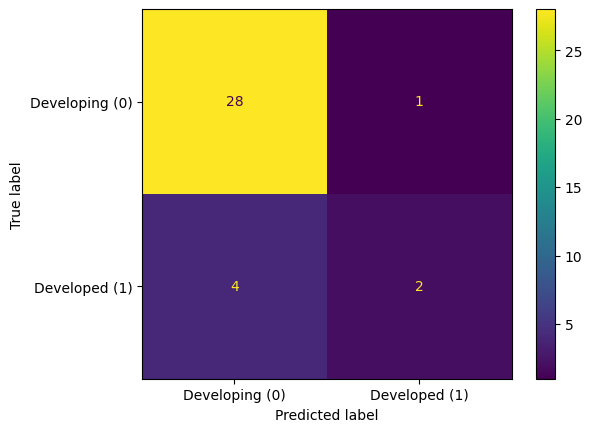

In [8]:
y = Econ_df.Status
X = Econ_df.drop(columns = ['Status'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Econ_dtc = DecisionTreeClassifier(max_depth=5)
Econ_dtc.fit(X_train, y_train)
y_pred = Econ_dtc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
cmtr = confusion_matrix(y_test, y_pred) # CM Scores again
disptr = ConfusionMatrixDisplay(confusion_matrix=cmtr,
                               display_labels=['Developing (0)','Developed (1)']) # Making the display
disptr.plot() # Plotting it
plt.show() # Showing it

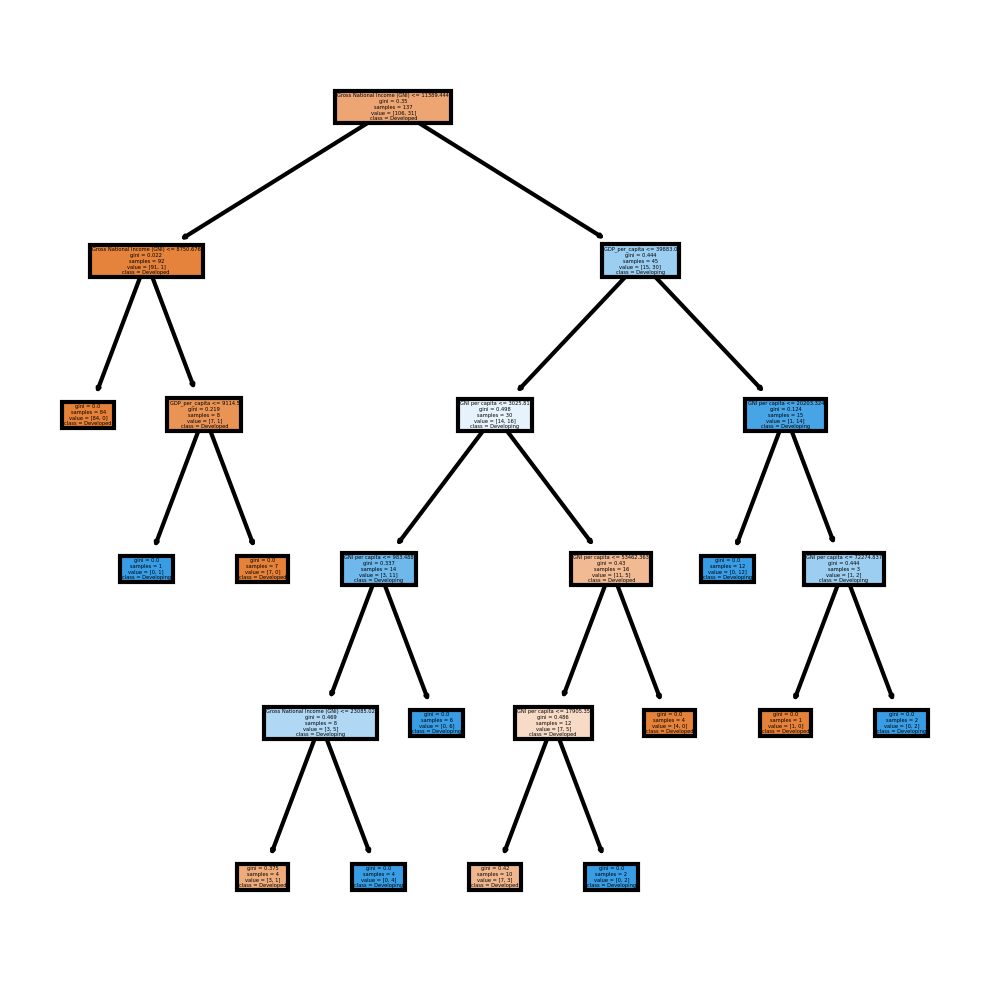

In [9]:
from sklearn import tree
fn=['GDP_per_capita','Gross National Income (GNI)','GNI per capita']
cn=['Developed', 'Developing']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(Econ_dtc,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Social_Health_df

In [10]:
Social_Health_df

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Status
0,53.2,70.4,227.7350,0.00,65,42,23.3,67,65,0.03,34.41,17.2,17.3,3.6,63.4,0
1,8.5,9.6,75.2050,4.33,99,98,26.6,99,99,0.03,2.88,1.2,1.3,9.7,78.0,0
2,21.6,25.2,95.8155,0.55,95,99,25.5,95,95,0.05,39.73,6.0,5.8,7.9,76.1,0
3,57.7,88.1,242.9655,6.53,64,64,23.2,62,64,0.89,27.88,8.3,8.2,5.0,59.4,0
4,6.5,7.8,130.0025,9.06,99,84,26.6,86,99,0.20,0.09,3.3,3.3,9.2,76.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,16.4,19.1,141.5540,6.21,87,83,26.7,87,87,0.40,30.08,1.6,1.5,10.1,72.6,0
168,17.4,21.8,124.5470,2.98,97,65,21.7,97,97,0.12,92.68,14.2,14.5,8.0,75.1,0
169,46.1,60.7,221.5195,0.03,69,95,23.7,63,69,0.03,26.50,13.6,13.4,3.0,66.1,0
170,46.9,67.7,302.8220,3.50,90,47,22.5,90,90,4.48,15.88,6.3,6.1,6.9,61.7,0


[[23  3]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       0.75      1.00      0.86         9

    accuracy                           0.91        35
   macro avg       0.88      0.94      0.90        35
weighted avg       0.94      0.91      0.92        35



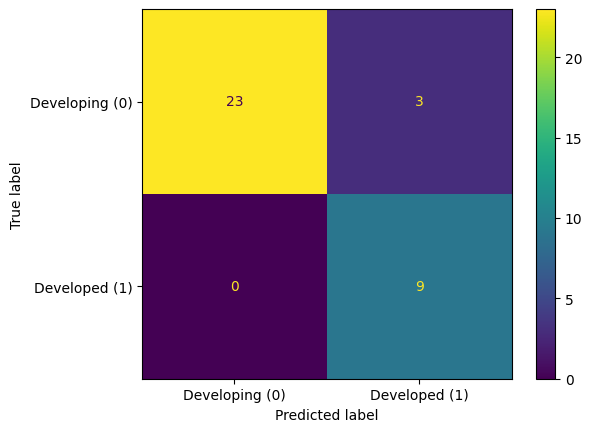

In [11]:
y = Social_Health_df.Status
X = Social_Health_df.drop(columns = ['Status'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

SH_dtc = DecisionTreeClassifier(max_depth=5)
SH_dtc.fit(X_train, y_train)
y_pred = SH_dtc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
cmtr = confusion_matrix(y_test, y_pred) # CM Scores again
disptr = ConfusionMatrixDisplay(confusion_matrix=cmtr,
                               display_labels=['Developing (0)','Developed (1)']) # Making the display
disptr.plot() # Plotting it
plt.show() # Showing it


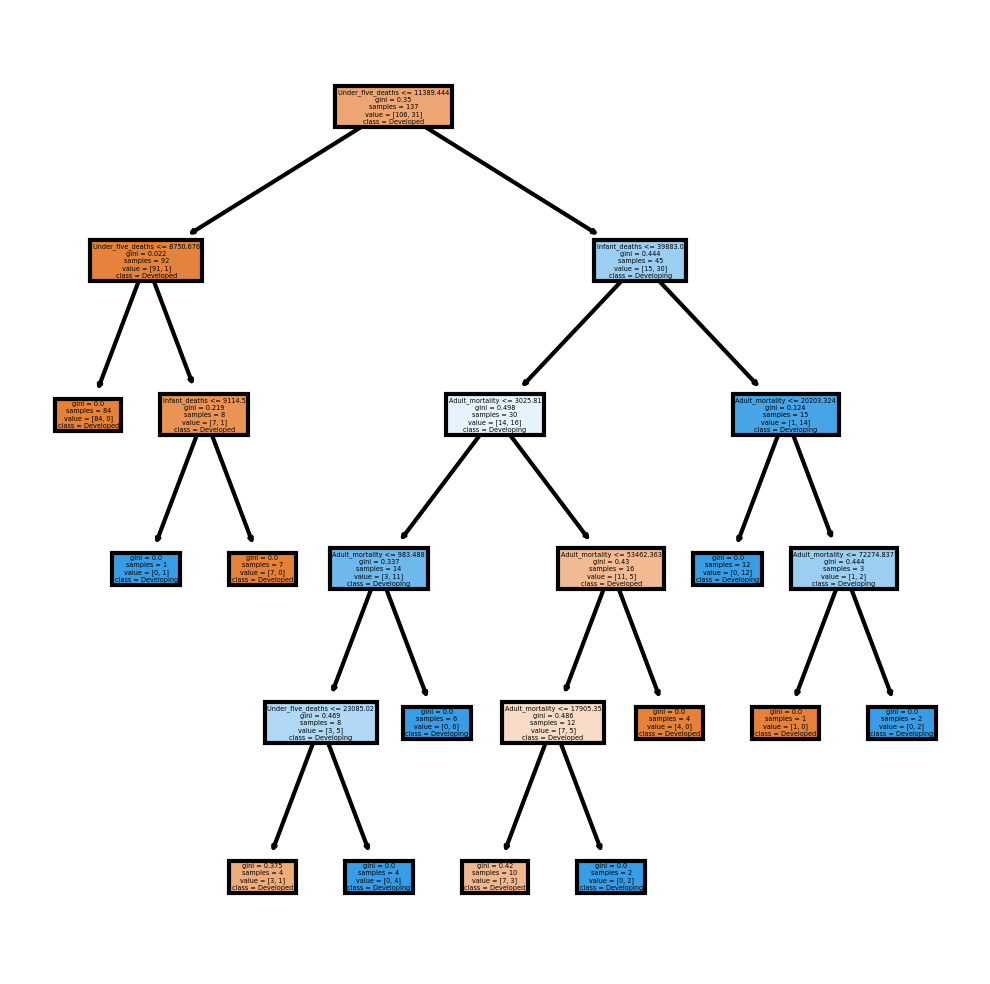

In [12]:
from sklearn import tree
fn=['Infant_deaths','Under_five_deaths','Adult_mortality','Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'Population_mln', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling', 'Life_expectancy']
cn=['Developed', 'Developing']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(Econ_dtc,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('DecisionTree.png') # Saving the picture